# Szupersűrű kódolás


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

A következő jupyter notebook a szupersűrű kódolást muatatja be feladatok által, főként a Qiskit tankönyv ide vonatkozó részét követve. A feladatok egyike sem kifejezetten nehéz, leginkább a jelenség mélyebb megértését igyekeznek elősegíteni. Minden feladat után további segítségek vannak a megoldásához, a tapasztaltabbak számára a feladatok ezek nélkül is megoldhatóak.


1. [Bevezetés](#bevezetés)
2. [A protokoll](#protokoll)    
    1. [1. lépés](#1)    
    2. [2. lépés](#2)    
    3. [3. lépés](#3)
3. [Kvantumáramkör](#áramkör)   
4. [A protokoll szimulációja](#szim)        
5. [Szupersűrű kódolás valódi kvantumszámítógépeken](#real)



Portik Attila (portik.attila@wigner.hu)

## 1. Bevezetés <a id='bevezetés'></a>

A szupersűrű kódolás egy módszer, ami lehetővé teszi, hogy valaki két klasszikus bitnek megfelelő információt küldjön egyetlen qubit használatával. A kvantumos teleportációhoz hasonlóan itt is egy összefonódott qubit párt használunk, ezátal a protokoll lehetővé teszi, hogy több bitnek megfelelő információt küldjünk egyetlen fizikai qubit elküldése által. A kommunikáló felek legyenek, a szokásos módon, Alice és Bob. Most nézzük meg hogyan épül fel egy ilyen protkoll. 

## 2. A protokoll <a id='protokoll'></a>

<center> <img src="https://qiskit.org/textbook/ch-algorithms/images/superdense.jpg" width="1000"/> </center>


### 1.lépés - 1.feladat: Bell állapot <a id='1'></a>
A folyamat egy haramadik féllel kezdődik, aki csak segítőként vesz részt a kommunikációban. Hívjuk öt, Charlinak. Charli létrehoz egy összefonódott qubit párt, melynek egy-egy elemét elküldi Alicenak és Bobnak. Egy összefont qubit párt két qubit alkot, melyeket a kvantum-összefonódás jelensége kapcsol össze. Ilyenkor a két qubit által alkotott teljes rendszer állapotát nem lehet a qubitek kvantumállapotának megadásával leírni. Összefonódás fennállhat egymástól térben távol eső rendszerek között is, így például egy összefont qubit pár egy-egy tagja lehet az egymástól távol elhelyezkedő Alicenál és Bobnál. A protokoll során létrehozott pár egy jól ismert állapotban van, az úgynevezett *Bell állapotban*  $\left( \vert\psi\rangle =\frac{1}{\sqrt{2}}\left(\vert00\rangle + \vert11\rangle\right)\right)$, ami a qubit pár egy maximálisan összefont állapota. Kezdetben mindkét qubit a $\ket{0}$ bázisállapotban van. Ezután Charlie alkalmaz egy  CNOT ($CX$) kaput a qubiteken, úgy hogy az első qubit legyen a kontroll, majd egy Hadamard kaput alakalmaz az első qubiten.

***Ellenőrizzétek le a Charlie által végzett folyamatot, azaz az alábbi egyenlőség helyességét!***

$$
CX\left(H \otimes I \left(\ket{0}_A \otimes \ket{0}_B \right)\right) = \frac{1}{\sqrt{2}}\left(\ket{00}+\ket{11}\right) = \frac{1}{\sqrt{2}}\left(\ket{0}_A\otimes\ket{0}_B+\ket{1}_A\otimes\ket{1}_B\right)
$$
ahol az állapot $A$ illetve $B$ indexe Alicera és Bobra utal, és $\ket{i}_A\otimes\ket{j}_B = \ket{ij}$.

<details>
    <summary>További segítség a feladat megoldásához.</summary>
<p>
<li> Bell állapot létrehozásához egy <i>Hadamard</i> és egy <i>CNOT</i> kvantum logikai kapu megfelelő kombinációjára lesz szükségetek. Ezek hatása a kövekező formában adható meg: </li>  
Hadamard kapu: 
    
$
\begin{array}{c}
    H\vert0\rangle = \frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)\\    
    H\vert1\rangle = \frac{1}{\sqrt{2}}\left(\vert0\rangle - \vert1\rangle\right)\\
\end{array}
$
    
<a href="https://www.quantum-inspire.com/kbase/hadamard/">További részletek. </a> 
    
    
CNOT kapu:

$
\begin{array}{c}
    CX\vert00\rangle = \vert00\rangle \\
    CX\vert01\rangle = \vert01\rangle \\
    CX\vert10\rangle = \vert11\rangle \\
    CX\vert11\rangle = \vert10\rangle \\
\end{array}
$    

<a href="https://www.quantum-inspire.com/kbase/cnot/">További részletek. </a> 


</p>
</details>

-------------------------------------

$$
\begin{array}{rl}
CX\left(H \otimes I \left(\ket{0}_A \otimes \ket{0}_B \right)\right) 
& = CX\left( H  \ket{0}_A \otimes \ket{0}_B \right) \\
& = CX\left( \frac{1}{\sqrt{2}}  \left(\ket{0}_A + \ket{1}_A \right) \otimes \ket{0}_B \right) \\ 
& = \frac{1}{\sqrt{2}} CX \left( \ket{0}_A \otimes \ket{0}_B + \ket{1}_A \otimes \ket{0}_B \right) \\
& = \frac{1}{\sqrt{2}}  \left(CX \ket{0}_A \otimes \ket{0}_B + CX \ket{1}_A \otimes \ket{0}_B \right) \\
& = \frac{1}{\sqrt{2}} \left( \ket{0}_A \otimes \ket{0}_B + \ket{1}_A \otimes \ket{1}_B \right) \\
\end{array}
$$

### 2.lépés - 2.feladat: Alice protokollja<a id='2'></a>

Miután mindketten megkapták a Bell pár egy-egy darabját, elkezdődhet a kommunikáció. Ehhez először Alicenak, az üzenet küldőjének, el kell kódolni az üzenetet, azaz a két klasszikus bit értéket a saját qubitjének állapotában. Minden lehetséges üzenetnek megfelel egy előre meghatározott kvantumállapot, az alábbi táblázat szerint. Ezeket a megfelelő kvantum logikai kapuk alkalmazásával állíthatja elő Alice (Alice csak a saját qubitjére tud hatni!).

***Égészítsétek ki a következő táblazatot a megfelelő kvantum logikai kapukkal, hogy a helyes kódolást kapjuk!***

<details>
    <summary>További segítség a feladat megoldásához.</summary>
<p>
<li> Alice legtöbb két különböző kvantum logikai kaput kell alkalmazzon az állapotok előállításához és ezek a következők lehetnek:</li>
    
$I$ kapu: $I\ket{0}=\ket{1}$ és $I\ket{1}=\ket{0}$

<a href="https://www.quantum-inspire.com/kbase/identity-gate/">További részletek. </a>  
    
$X$ kapu: $X\ket{0}=\ket{1}$ és $X\ket{1}=\ket{0}$
    
<a href="https://www.quantum-inspire.com/kbase/pauli-x/">További részletek. </a> 
    
$Z$ kapu $Z\ket{0}=\ket{0}$ és $Z\ket{1}=-\ket{1}$
    
<a href="https://www.quantum-inspire.com/kbase/pauli-z/">További részletek. </a> 
</p>

Például ha Alice a "01" üzenetet szeretné elküldeni akkor egy $X$ kaput kell alkalmaznia, hiszen:
    
$
X \otimes I \frac{1}{\sqrt{2}}\left(\ket{00} + \ket{11} \right) = X \otimes I \frac{1}{\sqrt{2}}\left(\ket{0}_A \otimes \ket{0}_B + \ket{1}_A \otimes \ket{1}_B \right)  = \frac{1}{\sqrt{2}}\left(X \ket{0}_A \otimes I \ket{0}_B + X \ket{1}_A \otimes I \ket{1}_B \right) = \frac{1}{\sqrt{2}}\left(\ket{1}_A \otimes  \ket{0}_B +  \ket{0}_A \otimes  \ket{1}_B \right) = \frac{1}{\sqrt{2}}\left(\ket{10} +  \ket{01} \right)
$
    
</details>

---------------------------

<table>
    <tr>
        <th>Üzenet</th>
        <th>Alkalmazott kapuk</th>
        <th>Kvantumállapot($\cdot 1/ \sqrt{2}$)</th>
    </tr>
    <tr>
        <td>00</td>
        <td> I </td>
        <td>$|00\rangle + |11\rangle$</td>
    </tr>
    <tr>
        <td>01</td>
        <td> X </td>
        <td>$|10\rangle + |01\rangle$</td>
    </tr>
    <tr>
        <td>10</td>
        <td> Z </td>
        <td>$|00\rangle - |11\rangle$</td>
    </tr>
    <tr>
        <td>11</td>
        <td> ZX </td>
        <td>$-|10\rangle + |01\rangle$</td>
    </tr>
</table>

### 3. lépés - 3. feladat: Bob protokollja<a id='2'></a>

A protokoll 3. lépésében Bob megkapja Alice qubitjét és a saját qubitjét használva dekódolja az üzenetét. Fontos, hogy Bobnak nem kell ismernie a qubit állapotát csak alkalmaznia kell "dekódoló" logikai műveletet. Azaz Bob alakalmaz egy CNOT kaput, ahol Alice qubitje a kontroll, majd egy Hadamard kaput a qubitjén. Végül mérést hajt végre mindkét qubiten. 

***Elenőrizzétek le, hogy minden lehetséges állapot esetén Bob a megfelő üzenetet dekódolja!***



<details>
    <summary>További segítség a feladat megoldásához.</summary>
<p>
<li> Például az első állapot esetén:</li>

$
H \otimes I \left(CX\frac{1}{\sqrt{2}}\left(\ket{00}+\ket{11}\right) \right) = I \otimes H \frac{1}{\sqrt{2}}\left(\ket{00}+\ket{10}\right) = \frac{1}{\sqrt{2}}\left(\frac{1}{\sqrt{2}}\left(\ket{0}_A+\ket{1}_A\right)\otimes \ket{0}_B + \frac{1}{\sqrt{2}}\left(\ket{0}_A-\ket{1}_A\right)\otimes \ket{0}_B  \right) = \frac{1}{2}\left(\ket{0}_A\otimes\ket{0}_B + \ket{1}_A\otimes\ket{0}_B + \ket{0}_A\otimes\ket{0}_B - \ket{1}_A\otimes\ket{0}_B \right) = \ket{0}_A \otimes \ket{0}_B = \ket{00}
$

    
</details>

--------------------------------------------------

$
\begin{array}{rl}
H \otimes I \left(CX\frac{1}{\sqrt{2}}\left(\ket{00}+\ket{11}\right) \right) 
& = H \otimes I \frac{1}{\sqrt{2}}\left(\ket{00}+\ket{10}\right) \\
& = \frac{1}{2} \left( \left(\ket{0}_A+\ket{1}_A\right)\otimes \ket{0}_B +
\left(\ket{0}_A -\ket{1}_A\right)\otimes \ket{0}_B  \right)  \\
& = \frac{1}{2}\left(\ket{0}_A\otimes\ket{0}_B + \ket{1}_A\otimes\ket{0}_B + \ket{0}_A\otimes\ket{0}_B - \ket{1}_A\otimes\ket{0}_B \right) \\ 
& = \ket{0}_A \otimes \ket{0}_B = \ket{00}
\end{array}
$


$
\begin{array}{rl}
H \otimes I \left(CX\frac{1}{\sqrt{2}}\left(\ket{10}+\ket{01}\right) \right) 
& = H \otimes I \frac{1}{\sqrt{2}}\left(\ket{11}+\ket{01}\right) \\
& = \frac{1}{2} \left( \left(\ket{0}_A-\ket{1}_A\right)\otimes \ket{1}_B +  \left(\ket{0}_A+\ket{1}_A\right)\otimes \ket{1}_B  \right)  \\
& = \frac{1}{2}\left(\ket{0}_A\otimes\ket{1}_B - \ket{1}_A\otimes\ket{1}_B + \ket{0}_A\otimes\ket{1}_B + \ket{1}_A\otimes\ket{1}_B \right) \\ 
& = \ket{0}_A \otimes \ket{1}_B = \ket{01}
\end{array}
$


$
\begin{array}{rl}
H \otimes I \left(CX\frac{1}{\sqrt{2}}\left(\ket{00}-\ket{11}\right) \right) 
& = H \otimes I \frac{1}{\sqrt{2}}\left(\ket{00}-\ket{10}\right) \\
& = \frac{1}{2} \left( \left(\ket{0}_A+\ket{1}_A\right)\otimes \ket{0}_B -
\left(\ket{0}_A -\ket{1}_A\right)\otimes \ket{0}_B  \right)  \\
& = \frac{1}{2}\left(\ket{0}_A\otimes\ket{0}_B + \ket{1}_A\otimes\ket{0}_B 
- \ket{0}_A\otimes\ket{0}_B + \ket{1}_A\otimes\ket{0}_B \right) \\ 
& = \ket{0}_A \otimes \ket{0}_B = \ket{10}
\end{array}
$


$
\begin{array}{rl}
H \otimes I \left(CX\frac{1}{\sqrt{2}}\left(-\ket{10}+\ket{01}\right) \right) 
& = H \otimes I \frac{1}{\sqrt{2}}\left(-\ket{11}+\ket{01}\right) \\
& = -\frac{1}{2} \left( \left(\ket{0}_A-\ket{1}_A\right)\otimes \ket{1}_B +
\left(\ket{0}_A+\ket{1}_A\right)\otimes \ket{1}_B  \right)  \\
& = \frac{1}{2}\left(-\ket{0}_A\otimes\ket{1}_B + \ket{1}_A\otimes\ket{1}_B + \ket{0}_A\otimes\ket{1}_B + \ket{1}_A\otimes\ket{1}_B \right) \\ 
& = \ket{1}_A \otimes \ket{1}_B = \ket{11}
\end{array}
$

## 3. Az áramkör - 4. feladat  <a id='áramkör'></a>

Most már láttuk a protokoll működését lépésről lépésre, így elkezdhetjük megvalósítani, azaz megépíteni a neki megfelelő kvantum logikai áramkört.

***Állítsátok össze a fent felvázolt protokollt megvalósító kvantumáramkört a qiskit segítségével!***
- írjatok egy python függvényt, amely a bementként kapott üzenet alapján létrehozza kvantumáramkört

<details>
    <summary>További segítség a feladat megoldásához.</summary>
    
<br>
<li>a megoldáshoz javasolt modulok:</li>

``` python
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister # áramkör létrehozása
from qiskit.visualization import plot_histogram, plot_bloch_multivector # ábrázolás
```

<br>

<li> 2 kvantum és 2 klasszikus regiszterrel rendelkező áramkör létrehozása:</li>
    
``` python
qr = QuantumRegister(2) #kvantum regiszterek létrehozása
cr1 = ClassicalRegister(1) #klasszikus regiszter létrehozása
cr2 = ClassicalRegister(1) #klasszikus regiszter létrehozása
qc = QuantumCircuit(qr,cr1,cr2) #kvantumáramkör létrehozása
```      

<br>

<li>különböző kvantum logikai kapuk és mérések hozzáadása az áramkörhöz:</li>
    
``` python
qc.h(0) # Hadamard kapu az 1. qubiten (a kiválasztott qubit többféleképpen is megadható minden egyqubites kapu esetén, nincs közöttük érdemi különbség)
#vagy
qc.h(qr[0]) 
#vagy
q0 = qr[0]
qc.h(q0)

qc.x(0) # X kapu az 1. qubiten 

qc.z(0) # Z kapu az 1. qubiten

qc.u3(theta, phi, lam,, 0) # 3 szögparaméteres (theta, phi, lam) általános forgatás alkalmazása az 1. qubiten

qc.cx(0,1) # CNOT (CX) kapu az 1. qubiten a 2. qubit által kontrollálva

qc.measure(0,cr1) # az 1. qubit mérése, az eredményt a cr1 klasszikus regiszter fogja tárolni

# a szimulált áramkör estén alkalmazhatunk feltételeket
qc.x(0).c_if(cr1, 1) # X kapu alkamazása az 1. qubiten ha a cr1 klasszikus regiszter értéke "1"
    
```
    
<br>

<li> az áramkör ábrázolása:</li>
    
``` python
qc.draw(output='mpl') #az áramkör ábrázolása (matplotlib stílusban)
qc.draw() #az áramkör ábrázolása (text stílusban)
```    
<br>
    
</details>

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister 
from qiskit import IBMQ, Aer, transpile, assemble 
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.result import marginal_counts
from qiskit.quantum_info import Statevector
import numpy as np
import sympy as sp
sp.init_printing()

In [2]:
def superdense(üzenet):
    ''' '''

    qr = QuantumRegister(2) #kvantum regiszterek létrehozása
    cr1 = ClassicalRegister(1) #klasszikus regiszter létrehozása
    cr2 = ClassicalRegister(1) #klasszikus regiszter létrehozása
    qc = QuantumCircuit(qr,cr1,cr2) #kvantumáramkör létrehozása
    
    # Bell pár létrehozása
    qc.h(1)
    qc.cx(1, 0)
    qc.barrier()
    
    if üzenet[1] == "1":
        qc.x(0)
    if üzenet[0] == "1":
        qc.z(0)
        
    qc.barrier()
    
    qc.cx(1, 0)
    qc.h(1)
    
    qc.barrier()
    
    qc.measure(0,cr1)
    qc.measure(1,cr2)
    return qc

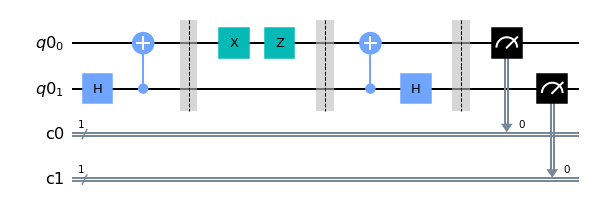

In [3]:
qc = superdense('11')
qc.draw()

## 4. A protokoll szimulációja - 5. feladat  <a id='szim'></a>

***A megalkotott áramkör működését szimuláljátok az Aer szimulátor segítségével.***
- minden lehetséges üzenet esetén ellenőrizzétek le a protokoll működését, azaz a mérési eredményt hasonlítsátok össze a küldött üzenettel

<details>
    <summary>További segítség a feladat megoldásához.</summary>
<li> az áramkör szimulációja</li>

    
``` python
    
from qiskit import IBMQ, Aer, transpile, assemble #modulok az áramkör szimulálására és futtatására
    
sim = Aer.get_backend('aer_simulator') # kiválasztjuk, hogy az Aer szimulátort szeretnénk használni és, hogy az állapotvektorokat akarjuk megkapni eredményül
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector() #futtatjuk az áramkört és lekérdezzük az eredményt leíró állapotvektorokat
plot_bloch_multivector(out_vector)#ábrázoljuk a kezdeti és végállapotokat a Bloch gömbön
```   
vagy ha a mérések eredménye érdekel:
```python
t_qc = transpile(qc, sim) #egy kísérlet létrehozása az általunk létrehozott áramkörből, melyet a kiválasztott backend-en végrehajtunk
counts = sim.run(t_qc).result().get_counts() #a kísérlet végrehajtása és a mérési eredmények lekérdezése
plot_histogram(counts) #az eredmények ábrázolása hisztogrammal

```

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


üzenet: 00


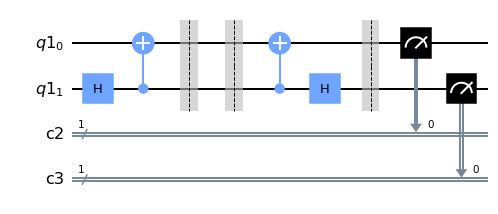

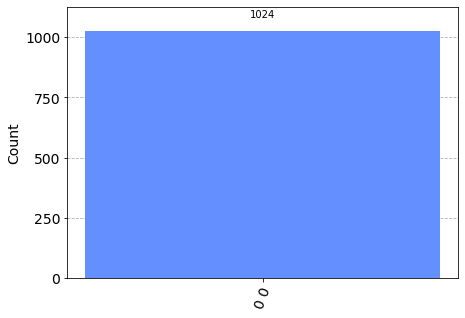

üzenet: 01


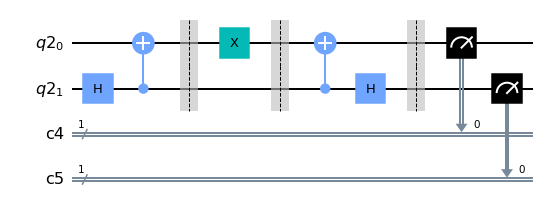

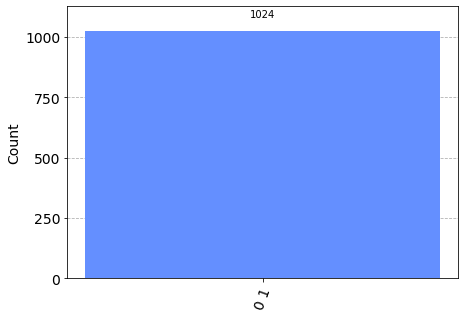

üzenet: 10


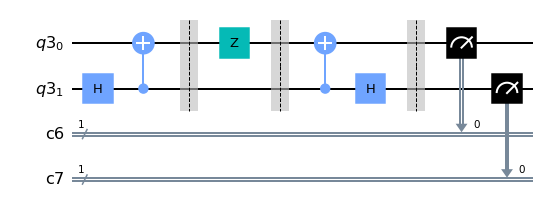

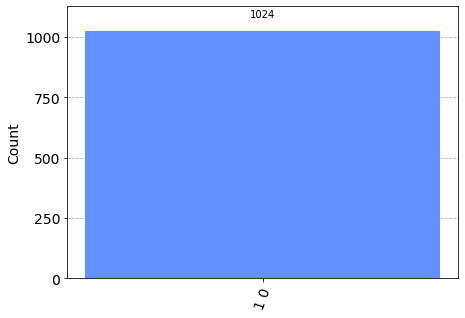

üzenet: 11


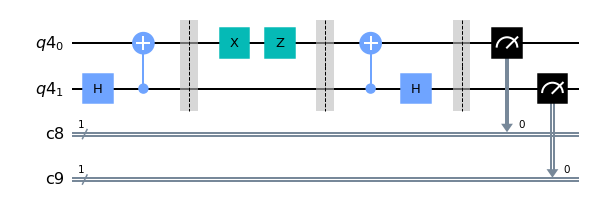

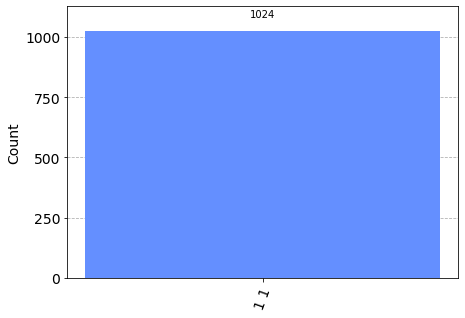

In [4]:
üzenetek = ['00', '01', '10', '11']

aer_sim = Aer.get_backend('aer_simulator')

for üzenet in üzenetek:
    print('üzenet:', üzenet)
    qc = superdense(üzenet)
    display(qc.draw())
    qobj = assemble(qc)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts(qc)
    display(plot_histogram(counts))


## 4. Szupersűrű kódolás valódi kvantumszámítógépeken - 6. feladat <a id='real'></a>

Ha a szimuláció eredményei azt mutatták, hogy a létrehozott áramkör jól valósítja meg a protkollt, akkor már csak egy dolog van hátra, hogy a protokollt végrehajtsuk egy valódi kvantumszámítógépen.

***Hajtsátok végre a protokollt az egyik elérhető kvantumszámítogépen és értelmezzétek az eredményt!***

<details>
    <summary>További segítség a feladat megoldásához.</summary>
<li> egy áramkör futtatása egy kvantumszámítógépen</li>

<br>
    
``` python
from qiskit import IBMQ  #felhasználófiókunk betöltése
IBMQ.load_account()
from qiskit.providers.ibmq import least_busy #ez a modul segít kiválasztani a legkevésbé foglalt gépet (ahol a legkevesebbet kell várnunk)
from qiskit.tools.monitor import job_monitor #ez a modul lehetővé teszi, hogy kövessük az elindított kísérlet állapotát

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True)) # a megefelelő backend kiválasztása (azaz legkevésbé foglalt, valódi gép, legalább 2 qubitje van)

t_qc = transpile(qc, backend) #egy "kísérlet" létrehozása az általunk definiált áramkörből (qc) a kiválasztott eszközön (backend)
job = backend.run(t_qc) #kísérlet eildítása
job_monitor(job)  #a kísérlet állapotának követése


exp_result = job.result() # a kísérlet eredményének lekérése
exp_counts = exp_result.get_counts(qc) # a mérési eredmények lekérése
plot_histogram(exp_counts) # a mérési eredmények ábrázolása hisztogramon
```

In [5]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor


IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

least busy backend:  ibmq_manila
üzenet: 00
Job Status: job has successfully run


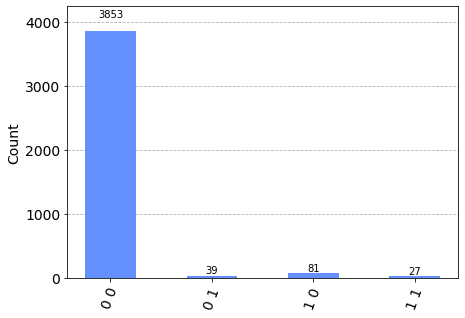

üzenet: 01
Job Status: job has successfully run


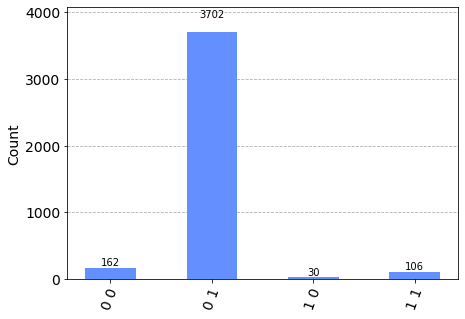

üzenet: 10
Job Status: job has successfully run


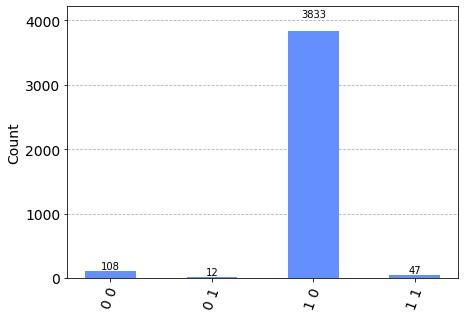

üzenet: 11
Job Status: job has successfully run


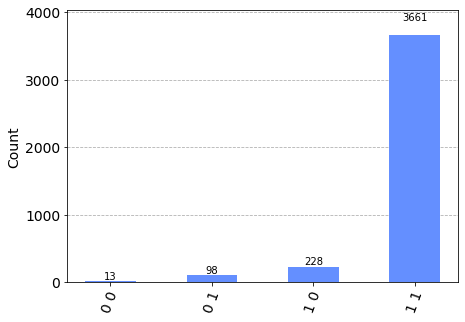

In [6]:
shots = 1024
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

for üzenet in üzenetek:
    print('üzenet:', üzenet)
    qc = superdense(üzenet)
    t_qc = transpile(qc, backend, optimization_level=3)
    job = backend.run(t_qc)
    job_monitor(job)
    result = job.result()
    display(plot_histogram(result.get_counts(qc)))
